### Getting the coordinates using the geocoder for the Sulur Location

In [75]:
from geopy.geocoders import Nominatim
address = 'Sulur, Coimbatore'

geolocator = Nominatim(user_agent="sulur_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Sulur Town are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Sulur Town are 11.0268912, 77.1258565.


### Installing the folium library

In [76]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


### Plotting the map using folium for sulur location

In [77]:
map_sulur = folium.Map(location=[latitude, longitude], zoom_start=10)

map_sulur

### Credentials for using FourSquare API

In [78]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: D32MONOILNKWLLZWSYTUUML1IQTIMMYDR1KVTZ20HM4RDF1C
CLIENT_SECRET:LWTQXE0COR0CHUK5I0ZHMWQA5NLAQYLHBWQ44Q00VSTERK04


### configure the request

In [79]:
import requests
radius = 500
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

### make the api call and get the results

In [80]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cf74047f594df57ee2c6f6c'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-58f481ad829b0c25ebaa36d8-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1fa931735',
         'name': 'Hotel',
         'pluralName': 'Hotels',
         'primary': True,
         'shortName': 'Hotel'}],
       'id': '58f481ad829b0c25ebaa36d8',
       'location': {'cc': 'IN',
        'city': 'Sulur',
        'country': 'India',
        'distance': 336,
        'formattedAddress': ['Sulur 641402', 'Tamil Nadu', 'India'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 11.028149,
          'lng': 77.128657}],
        'lat': 11.028149,
        'lng': 77.128657,
        'po

### Get the pincodes and locations of coimbatore

In [81]:
pincode_url = requests.get('https://www.mapsofindia.com/pincode/india/tamil-nadu/coimbatore/').text
#url = 'https://www.mapsofindia.com/pincode/india/tamil-nadu/coimbatore/'

In [82]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(pincode_url,'lxml')

print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Pin Code of Coimbatore in Tamil Nadu, Coimbatore Postal Code
  </title>
  <meta content="Get Pin Code (Zip Code) of Coimbatore, district of Tamil Nadu. Find out Pin Code or postal code list of all Pin Code zones of Coimbatore district." name="description"/>
  <meta content="Pin Code of Coimbatore, Pin Code of Coimbatore, postal code of Coimbatore, zip code of Coimbatore, Coimbatore pincode, Coimbatore postal code, Coimbatore zipcode." name="keywords"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0" name="viewport"/>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <link href="https://m.mapsofindia.com/pincode/tamil-nadu/coimbatore/" media="only screen and (max-width:736px)" rel="alternate"/>
  <link href="https://m.mapsofindia.com/pincode/amp/tamil-nadu/coimbatore/" rel="amphtml"/>
  <script src="https://www.mapsofindia.com/elements/style.js">
  </script>
  <script language="JavaSc

In [83]:
table = soup.find('',{'class':'tables table2 sliderespon'})

In [84]:
columns = ['Location','Pincode','State','District']
locations = []
pincodes = []
states = []
districts = []

l = True
p = False
s = False
d = False

rows = table.findAll('td')
for row in rows:
    if l:
        locations.append(row.text)
        l = False
        p = True
    elif p:
        pincodes.append(row.text)
        p = False
        s = True
    elif s:
        states.append(row.text)
        s = False
        d = True
    elif d:
        districts.append(row.text)
        d = False
        l = True
del locations[0]
del pincodes[0]
del states[0]
del districts[0]

import pandas as pd
df = pd.DataFrame()
df[columns[0]] = locations
df[columns[1]] = pincodes
df[columns[2]] = states
df[columns[3]] = districts
df

,Location,Pincode,State,District
0,A.Nagore,642205,Tamil Nadu,Coimbatore
1,Achipatti,642002,Tamil Nadu,Coimbatore
2,Agraharapudur,641663,Tamil Nadu,Coimbatore
3,Agraharasamakulam,641110,Tamil Nadu,Coimbatore
4,Akilandapuram,642004,Tamil Nadu,Coimbatore
5,Akkamalai,642127,Tamil Nadu,Coimbatore
6,Akkaraisengapalli,641302,Tamil Nadu,Coimbatore
7,Alagirichettipalayam,642110,Tamil Nadu,Coimbatore
8,Alagumalai,641665,Tamil Nadu,Coimbatore
9,Alancombu,641302,Tamil Nadu,Coimbatore


### Get the latitude and longitude for all the locations in Coimbatore

In [85]:
latitudes = []
longitudes = []
from geopy.geocoders import Nominatim
for location in locations:
    geolocator = Nominatim(user_agent="pincode_explorer")
    try:
        loca = geolocator.geocode(location)
        if loca:
            latitude = loca.latitude
            longitude = loca.longitude
            latitudes.append(latitude)
            longitudes.append(longitude)
        else:
            latitudes.append('NaN')
            longitudes.append('NaN')
    except:
        latitudes.append('NaN')
        longitudes.append('NaN')
df['Latitude'] = latitudes
df['Longitude'] = longitudes
df

,Location,Pincode,State,District,Latitude,Longitude
0,A.Nagore,642205,Tamil Nadu,Coimbatore,10.8167,79.8404
1,Achipatti,642002,Tamil Nadu,Coimbatore,NaN,NaN
2,Agraharapudur,641663,Tamil Nadu,Coimbatore,NaN,NaN
3,Agraharasamakulam,641110,Tamil Nadu,Coimbatore,NaN,NaN
4,Akilandapuram,642004,Tamil Nadu,Coimbatore,10.8601,77.8747
5,Akkamalai,642127,Tamil Nadu,Coimbatore,10.3317,77.0195
6,Akkaraisengapalli,641302,Tamil Nadu,Coimbatore,NaN,NaN
7,Alagirichettipalayam,642110,Tamil Nadu,Coimbatore,NaN,NaN
8,Alagumalai,641665,Tamil Nadu,Coimbatore,NaN,NaN
9,Alancombu,641302,Tamil Nadu,Coimbatore,NaN,NaN


### Filter NaN's

In [86]:
ldf = df[df.Latitude != 'NaN']

In [87]:
ldf = ldf.reset_index(drop = True)
ldf

,Location,Pincode,State,District,Latitude,Longitude
0,A.Nagore,642205,Tamil Nadu,Coimbatore,10.8167,79.8404
1,Akilandapuram,642004,Tamil Nadu,Coimbatore,10.8601,77.8747
2,Akkamalai,642127,Tamil Nadu,Coimbatore,10.3317,77.0195
3,Alandurai,641101,Tamil Nadu,Coimbatore,10.9541,76.7905
4,Alathur,641655,Tamil Nadu,Coimbatore,10.6459,76.5436
5,Amaravathi Nagar,642102,Tamil Nadu,Coimbatore,17.405,78.4633
6,Ammapatti,642205,Tamil Nadu,Coimbatore,10.3497,78.5634
7,Anaikatti,641108,Tamil Nadu,Coimbatore,12.818,79.7279
8,Anaimalai,642104,Tamil Nadu,Coimbatore,10.5823,76.9343
9,Andipalayam,641687,Tamil Nadu,Coimbatore,11.0999,78.1092


In [88]:
ldf.shape

(223, 6)

In [90]:
# get all the venues for coimbatore neighborhood
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [91]:
coimbatore_venues = getNearbyVenues(names=ldf['Location'],
                                   latitudes=ldf['Latitude'],
                                   longitudes=ldf['Longitude']
                                  )

A.Nagore
Akilandapuram
Akkamalai
Alandurai
Alathur
Amaravathi Nagar
Ammapatti
Anaikatti
Anaimalai
Andipalayam
Angalakurichi
Annur
Arasampalayam
Arasur
Athipalayam
Bilichi
Bodipalayam
Chandrapuram
Chettipalayam
Chinnakallar
Chinnavedampatti
Cinchona
Cinchona East
Coimbatore
Coimbatore Aerodrome
Coimbatore Central
Coimbatore Collectorate
Coimbatore Courts
Coimbatore Fort
Coimbatore Industrial estate
Coimbatore Press colony
Coimbatore Racecourse
Coimbatore South
Coimbatore Ukkadam
Coimbatore West
Commercial Tax office building
Devarayapuram
Dhaliyur
Doddampatti
Doddapura
Edayarpalayam
Elayamuthur
Elur
Ettimadai
Ganapathipalayam
Ganapathy
Gandhi Market
Gandhinagar
Gandhipuram
Ganesapuram
Gomangalam
Govt.College of technology
Gudalur-coimbatore
Gudimangalam
Idigarai
Iduvampalayam
Irugur
J.Krishnapuram
Jadayampalayam
Jothipuram
K.Ayyampalayam
Kadampadi
Kalapatti
Kalingal
Kallampalayam Road
Kallar
Kallipalayam
Kamatchipuram
Kaniyur
Kanjampatti
Kanjapalli
Kannampalayam
Kanur
Karamadai
Karathol

In [92]:
print(coimbatore_venues.shape)

(2063, 7)


In [93]:
coimbatore_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,A.Nagore,10.816698,79.840364,fathima oticals,10.810779,79.841934,Optical Shop
1,A.Nagore,10.816698,79.840364,RS wines,10.825323,79.834312,Bar
2,Alandurai,10.954117,76.790529,Vishali Bakes,10.951575,76.775734,Bakery
3,Alandurai,10.954117,76.790529,Alandurai,10.961470,76.805166,Bus Station
4,Alathur,10.645897,76.543608,basics life,10.645089,76.546015,Men's Store
5,Alathur,10.645897,76.543608,Alathur New Bus Stand,10.645226,76.539772,Bus Station
6,Alathur,10.645897,76.543608,HANA HOTEL,10.644548,76.550011,Fast Food Restaurant
7,Alathur,10.645897,76.543608,Hotel Gayathri,10.646148,76.553765,Hotel
8,Amaravathi Nagar,17.404956,78.463251,Cafe Niloufer & Bakers,17.399715,78.462881,Café
9,Amaravathi Nagar,17.404956,78.463251,Nizam club,17.403221,78.468729,Lounge


### Find the categories and number of unique categories

In [94]:
print(coimbatore_venues["Venue Category"].unique())
print(len(coimbatore_venues["Venue Category"].unique()))

['Optical Shop' 'Bar' 'Bakery' 'Bus Station' "Men's Store"
 'Fast Food Restaurant' 'Hotel' 'Café' 'Lounge' 'Hyderabadi Restaurant'
 'Indian Restaurant' 'Multiplex' 'Science Museum' 'Scenic Lookout'
 'South Indian Restaurant' 'Bistro' 'Restaurant' 'Ice Cream Shop'
 'BBQ Joint' 'Vegetarian / Vegan Restaurant' 'Middle Eastern Restaurant'
 'Chaat Place' 'Chinese Restaurant' 'Performing Arts Venue' 'Lake'
 'Smoke Shop' 'Donut Shop' 'Hotel Bar' 'Stadium' 'Park' 'Pub' 'Coffee Shop'
 'Breakfast Spot' 'Garden' 'Bookstore' 'Pizza Place' 'Historic Site'
 'Food Court' 'Gaming Cafe' 'Mobile Phone Shop' 'Snack Place'
 'Sandwich Place' 'Department Store' 'Dessert Shop' 'Bowling Alley'
 'Italian Restaurant' 'Electronics Store' 'Bridal Shop' 'ATM'
 'Adult Boutique' 'Candy Store' 'Gym' 'Beer Store' 'Nightclub'
 'Japanese Restaurant' 'Caucasian Restaurant' 'Paintball Field'
 'Gym / Fitness Center' 'Movie Theater' 'Furniture / Home Store'
 'Auto Garage' 'Convenience Store' 'Cosmetics Shop' 'Tea Room'
 'Su

### Count of reported venues per location

In [95]:
coimbatore_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
A.Nagore,2,2,2,2,2,2
Alandurai,2,2,2,2,2,2
Alathur,4,4,4,4,4,4
Amaravathi Nagar,100,100,100,100,100,100
Anaikatti,2,2,2,2,2,2
Anaimalai,2,2,2,2,2,2
Annur,4,4,4,4,4,4
Bilichi,100,100,100,100,100,100
Bodipalayam,1,1,1,1,1,1


In [96]:
# plot all the venues in a map
# one hot encoding
coimbatore_onehot = pd.get_dummies(coimbatore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
coimbatore_onehot['Neighborhood'] = coimbatore_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [coimbatore_onehot.columns[-1]] + list(coimbatore_onehot.columns[:-1])
coimbatore_onehot = coimbatore_onehot[fixed_columns]

coimbatore_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Service,American Restaurant,Antique Shop,...,Train Station,Travel & Transport,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Voting Booth,Wine Bar,Wings Joint,Women's Store
0,A.Nagore,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A.Nagore,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alandurai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alandurai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alathur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
coimbatore_onehot.shape

(2063, 225)

In [98]:
coimbatore_grouped = coimbatore_onehot.groupby('Neighborhood').mean().reset_index()
coimbatore_grouped



,Neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Service,American Restaurant,Antique Shop,...,Train Station,Travel & Transport,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Voting Booth,Wine Bar,Wings Joint,Women's Store
0,A.Nagore,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
1,Alandurai,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
2,Alathur,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
3,Amaravathi Nagar,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.020000,0.0,0.000000,0.0,0.0,0.000000
4,Anaikatti,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
5,Anaimalai,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.500000,0.0,0.000000,0.0,0.0,0.000000
6,Annur,0.250000,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
7,Bilichi,0.000000,0.000000,0.01,0.000000,0.0,0.00,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
8,Bodipalayam,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
9,Chettipalayam,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000


In [99]:
coimbatore_grouped.shape

(147, 225)

In [100]:
num_top_venues = 5

for hood in coimbatore_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = coimbatore_grouped[coimbatore_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----A.Nagore----
                 venue  freq
0                  Bar   0.5
1         Optical Shop   0.5
2                  ATM   0.0
3         Noodle House   0.0
4  Moroccan Restaurant   0.0


----Alandurai----
                 venue  freq
0          Bus Station   0.5
1               Bakery   0.5
2                  ATM   0.0
3         Noodle House   0.0
4  Moroccan Restaurant   0.0


----Alathur----
                  venue  freq
0  Fast Food Restaurant  0.25
1                 Hotel  0.25
2           Men's Store  0.25
3           Bus Station  0.25
4                   ATM  0.00


----Amaravathi Nagar----
                  venue  freq
0     Indian Restaurant  0.14
1                 Hotel  0.08
2             Multiplex  0.07
3  Fast Food Restaurant  0.05
4    Chinese Restaurant  0.05


----Anaikatti----
                        venue  freq
0     South Indian Restaurant   0.5
1                 Bridal Shop   0.5
2                         ATM   0.0
3  Modern European Restaurant   0.0
4         

In [101]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [102]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = coimbatore_grouped['Neighborhood']

for ind in np.arange(coimbatore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(coimbatore_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A.Nagore,Bar,Optical Shop,Women's Store,Diner,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space
1,Alandurai,Bakery,Bus Station,Women's Store,Discount Store,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit
2,Alathur,Hotel,Fast Food Restaurant,Men's Store,Bus Station,Women's Store,Diner,Fish & Chips Shop,Farmers Market,Farm,Exhibit
3,Amaravathi Nagar,Indian Restaurant,Hotel,Multiplex,Fast Food Restaurant,Chinese Restaurant,Bakery,Restaurant,Café,Ice Cream Shop,Pizza Place
4,Anaikatti,South Indian Restaurant,Bridal Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space,Electronics Store


In [103]:
# places with least number of restaurants
neighborhoods_venues_sorted[~neighborhoods_venues_sorted["1st Most Common Venue"].str.contains("Restaurant") & ~neighborhoods_venues_sorted["2nd Most Common Venue"].str.contains("Restaurant") & ~neighborhoods_venues_sorted["3rd Most Common Venue"].str.contains("Restaurant")]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A.Nagore,Bar,Optical Shop,Women's Store,Diner,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space
1,Alandurai,Bakery,Bus Station,Women's Store,Discount Store,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit
7,Bilichi,Coffee Shop,Gym,Café,Park,Pizza Place,Cosmetics Shop,Restaurant,Forest,Gym / Fitness Center,Sushi Restaurant
8,Bodipalayam,Dhaba,Women's Store,Diner,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space
9,Chettipalayam,Golf Course,Women's Store,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space,Electronics Store
17,Coimbatore Courts,Clothing Store,Multiplex,Café,Indian Restaurant,Fast Food Restaurant,Asian Restaurant,Shopping Mall,Hotel,Dessert Shop,Department Store
18,Coimbatore Fort,Pizza Place,Multiplex,Bakery,Fast Food Restaurant,Indian Restaurant,Café,Asian Restaurant,Diner,Restaurant,Tea Room
26,Doddampatti,Light Rail Station,Women's Store,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space,Electronics Store
27,Edayarpalayam,Bakery,Bus Station,Pizza Place,Indian Restaurant,Chinese Restaurant,Tea Room,Women's Store,Fast Food Restaurant,Farmers Market,Farm
30,Ganapathipalayam,Bus Station,Women's Store,Coffee Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space


In [104]:
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 4

coimbatore_grouped_clustering = coimbatore_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(coimbatore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

In [108]:
ldf.columns = ['Neighborhood','Pincode','State','District','Latitude','Longitude']
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

coimbatore_merged = ldf

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
coimbatore_merged = coimbatore_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

coimbatore_merged.head() # check the last columns!

,Neighborhood,Pincode,State,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A.Nagore,642205,Tamil Nadu,Coimbatore,10.8167,79.8404,0.0,Bar,Optical Shop,Women's Store,Diner,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space
1,Akilandapuram,642004,Tamil Nadu,Coimbatore,10.8601,77.8747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akkamalai,642127,Tamil Nadu,Coimbatore,10.3317,77.0195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alandurai,641101,Tamil Nadu,Coimbatore,10.9541,76.7905,3.0,Bakery,Bus Station,Women's Store,Discount Store,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit
4,Alathur,641655,Tamil Nadu,Coimbatore,10.6459,76.5436,0.0,Hotel,Fast Food Restaurant,Men's Store,Bus Station,Women's Store,Diner,Fish & Chips Shop,Farmers Market,Farm,Exhibit


In [109]:
#coimbatore_merged[coimbatore_merged["Cluster Labels"] == "NaN"]
coimbatore_merged = coimbatore_merged[np.isfinite(coimbatore_merged['Cluster Labels'])]

In [110]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(coimbatore_merged['Latitude'], coimbatore_merged['Longitude'], coimbatore_merged['Neighborhood'], coimbatore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [111]:
coimbatore_merged

,Neighborhood,Pincode,State,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A.Nagore,642205,Tamil Nadu,Coimbatore,10.8167,79.8404,0.0,Bar,Optical Shop,Women's Store,Diner,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space
3,Alandurai,641101,Tamil Nadu,Coimbatore,10.9541,76.7905,3.0,Bakery,Bus Station,Women's Store,Discount Store,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit
4,Alathur,641655,Tamil Nadu,Coimbatore,10.6459,76.5436,0.0,Hotel,Fast Food Restaurant,Men's Store,Bus Station,Women's Store,Diner,Fish & Chips Shop,Farmers Market,Farm,Exhibit
5,Amaravathi Nagar,642102,Tamil Nadu,Coimbatore,17.405,78.4633,0.0,Indian Restaurant,Hotel,Multiplex,Fast Food Restaurant,Chinese Restaurant,Bakery,Restaurant,Café,Ice Cream Shop,Pizza Place
7,Anaikatti,641108,Tamil Nadu,Coimbatore,12.818,79.7279,0.0,South Indian Restaurant,Bridal Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space,Electronics Store
8,Anaimalai,642104,Tamil Nadu,Coimbatore,10.5823,76.9343,0.0,Vegetarian / Vegan Restaurant,Restaurant,Women's Store,Dim Sum Restaurant,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space
11,Annur,641653,Tamil Nadu,Coimbatore,11.233,77.1035,1.0,ATM,Indian Restaurant,Bus Station,South Indian Restaurant,Construction & Landscaping,Discount Store,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
15,Bilichi,641019,Tamil Nadu,Coimbatore,50.4648,30.3457,0.0,Coffee Shop,Gym,Café,Park,Pizza Place,Cosmetics Shop,Restaurant,Forest,Gym / Fitness Center,Sushi Restaurant
16,Bodipalayam,641105,Tamil Nadu,Coimbatore,10.9013,76.9767,0.0,Dhaba,Women's Store,Diner,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space
18,Chettipalayam,641201,Tamil Nadu,Coimbatore,10.9138,77.0375,0.0,Golf Course,Women's Store,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space,Electronics Store


In [112]:
coimbatore_merged[coimbatore_merged["1st Most Common Venue"].str.contains("Restaurant") & coimbatore_merged["2nd Most Common Venue"].str.contains("Restaurant") & coimbatore_merged["3rd Most Common Venue"].str.contains("Restaurant") | coimbatore_merged["4th Most Common Venue"].str.contains("Restaurant") | coimbatore_merged["5th Most Common Venue"].str.contains("Restaurant") | coimbatore_merged["6th Most Common Venue"].str.contains("Restaurant") | coimbatore_merged["7th Most Common Venue"].str.contains("Restaurant")]

,Neighborhood,Pincode,State,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A.Nagore,642205,Tamil Nadu,Coimbatore,10.8167,79.8404,0.0,Bar,Optical Shop,Women's Store,Diner,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space
3,Alandurai,641101,Tamil Nadu,Coimbatore,10.9541,76.7905,3.0,Bakery,Bus Station,Women's Store,Discount Store,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit
5,Amaravathi Nagar,642102,Tamil Nadu,Coimbatore,17.405,78.4633,0.0,Indian Restaurant,Hotel,Multiplex,Fast Food Restaurant,Chinese Restaurant,Bakery,Restaurant,Café,Ice Cream Shop,Pizza Place
7,Anaikatti,641108,Tamil Nadu,Coimbatore,12.818,79.7279,0.0,South Indian Restaurant,Bridal Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space,Electronics Store
8,Anaimalai,642104,Tamil Nadu,Coimbatore,10.5823,76.9343,0.0,Vegetarian / Vegan Restaurant,Restaurant,Women's Store,Dim Sum Restaurant,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space
11,Annur,641653,Tamil Nadu,Coimbatore,11.233,77.1035,1.0,ATM,Indian Restaurant,Bus Station,South Indian Restaurant,Construction & Landscaping,Discount Store,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
15,Bilichi,641019,Tamil Nadu,Coimbatore,50.4648,30.3457,0.0,Coffee Shop,Gym,Café,Park,Pizza Place,Cosmetics Shop,Restaurant,Forest,Gym / Fitness Center,Sushi Restaurant
16,Bodipalayam,641105,Tamil Nadu,Coimbatore,10.9013,76.9767,0.0,Dhaba,Women's Store,Diner,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space
18,Chettipalayam,641201,Tamil Nadu,Coimbatore,10.9138,77.0375,0.0,Golf Course,Women's Store,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space,Electronics Store
20,Chinnavedampatti,641006,Tamil Nadu,Coimbatore,11.0629,76.9843,1.0,Indian Restaurant,Clothing Store,Pizza Place,Shopping Mall,Multiplex,Women's Store,Dim Sum Restaurant,Farmers Market,Farm,Exhibit


In [113]:
coimbatore_grouped.columns

Index(['Neighborhood', 'ATM', 'Accessories Store', 'Adult Boutique',
       'Afghan Restaurant', 'African Restaurant', 'Airport', 'Airport Service',
       'American Restaurant', 'Antique Shop',
       ...
       'Train Station', 'Travel & Transport', 'Turkish Restaurant',
       'Udupi Restaurant', 'Vegetarian / Vegan Restaurant',
       'Vietnamese Restaurant', 'Voting Booth', 'Wine Bar', 'Wings Joint',
       'Women's Store'],
      dtype='object', length=225)

In [114]:
coimbatore_grouped
#c_grouped = coimbatore_grouped.filter(regex='Restaurant')
#c_grouped['Neighborhood'] = coimbatore_grouped['Neighborhood']
#c_grouped['freq'] = coimbatore_grouped['freq']

,Neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Service,American Restaurant,Antique Shop,...,Train Station,Travel & Transport,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Voting Booth,Wine Bar,Wings Joint,Women's Store
0,A.Nagore,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
1,Alandurai,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
2,Alathur,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
3,Amaravathi Nagar,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.020000,0.0,0.000000,0.0,0.0,0.000000
4,Anaikatti,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
5,Anaimalai,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.500000,0.0,0.000000,0.0,0.0,0.000000
6,Annur,0.250000,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
7,Bilichi,0.000000,0.000000,0.01,0.000000,0.0,0.00,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
8,Bodipalayam,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
9,Chettipalayam,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000


In [115]:
hoods = []
freqs = []
venues = []
num_top_venues = 5

for hood in coimbatore_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = coimbatore_grouped[coimbatore_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp[temp.venue.str.contains("Restaurant")].sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    te = temp[temp.venue.str.contains("Restaurant")].sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues)
    for i in range(num_top_venues):
        hoods.append(hood)
        venues.append(te.iloc[i,0])
        freqs.append(te.iloc[i,1])
    print('\n')

----A.Nagore----
                        venue  freq
0           Afghan Restaurant   0.0
1          Seafood Restaurant   0.0
2          Mexican Restaurant   0.0
3   Middle Eastern Restaurant   0.0
4  Modern European Restaurant   0.0


----Alandurai----
                        venue  freq
0           Afghan Restaurant   0.0
1          Seafood Restaurant   0.0
2          Mexican Restaurant   0.0
3   Middle Eastern Restaurant   0.0
4  Modern European Restaurant   0.0


----Alathur----
                        venue  freq
0        Fast Food Restaurant  0.25
1           Afghan Restaurant  0.00
2      Shabu-Shabu Restaurant  0.00
3   Middle Eastern Restaurant  0.00
4  Modern European Restaurant  0.00


----Amaravathi Nagar----
                           venue  freq
0              Indian Restaurant  0.14
1             Chinese Restaurant  0.05
2           Fast Food Restaurant  0.05
3                     Restaurant  0.04
4  Vegetarian / Vegan Restaurant  0.02


----Anaikatti----
                

In [116]:
res = pd.DataFrame()
res["Neighborhood"] = hoods
res["Venue"] = venues
res["Frequency"] = freqs
res[res["Frequency"]>=0.50].sort_values('Frequency',ascending = False).reset_index(drop=True)

,Neighborhood,Venue,Frequency
0,Meenakshipuram,Restaurant,1.00
1,Naickenpalayam,South Indian Restaurant,1.00
2,Ettimadai,Indian Restaurant,0.75
3,Anaikatti,South Indian Restaurant,0.50
4,Anaimalai,Vegetarian / Vegan Restaurant,0.50
5,Anaimalai,Restaurant,0.50
6,Coimbatore Press colony,Fast Food Restaurant,0.50
7,Ganapathy,Indian Restaurant,0.50
8,Gandhi Market,Restaurant,0.50
9,Ganesapuram,Indian Restaurant,0.50


In [117]:
res[res["Frequency"] != 0.0].sort_values('Frequency',ascending = False).reset_index(drop=True)

,Neighborhood,Venue,Frequency
0,Meenakshipuram,Restaurant,1.00
1,Naickenpalayam,South Indian Restaurant,1.00
2,Ettimadai,Indian Restaurant,0.75
3,Ganapathy,Indian Restaurant,0.50
4,Gandhi Market,Restaurant,0.50
5,Ganesapuram,Indian Restaurant,0.50
6,V.Kallipalayam,Asian Restaurant,0.50
7,Sholayar,Indian Restaurant,0.50
8,Kallipalayam,Asian Restaurant,0.50
9,Coimbatore Press colony,Fast Food Restaurant,0.50


## Cluster 1

In [118]:
coimbatore_merged.loc[coimbatore_merged['Cluster Labels'] == 0, coimbatore_merged.columns[[1] + list(range(5, coimbatore_merged.shape[1]))]]

,Pincode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,642205,79.8404,0.0,Bar,Optical Shop,Women's Store,Diner,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space
4,641655,76.5436,0.0,Hotel,Fast Food Restaurant,Men's Store,Bus Station,Women's Store,Diner,Fish & Chips Shop,Farmers Market,Farm,Exhibit
5,642102,78.4633,0.0,Indian Restaurant,Hotel,Multiplex,Fast Food Restaurant,Chinese Restaurant,Bakery,Restaurant,Café,Ice Cream Shop,Pizza Place
7,641108,79.7279,0.0,South Indian Restaurant,Bridal Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space,Electronics Store
8,642104,76.9343,0.0,Vegetarian / Vegan Restaurant,Restaurant,Women's Store,Dim Sum Restaurant,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space
15,641019,30.3457,0.0,Coffee Shop,Gym,Café,Park,Pizza Place,Cosmetics Shop,Restaurant,Forest,Gym / Fitness Center,Sushi Restaurant
16,641105,76.9767,0.0,Dhaba,Women's Store,Diner,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space
18,641201,77.0375,0.0,Golf Course,Women's Store,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space,Electronics Store
21,642106,-84.1682,0.0,Latin American Restaurant,Restaurant,Cafeteria,Scenic Lookout,Women's Store,Farmers Market,Farm,Exhibit,Event Space,Electronics Store
22,642106,-84.1682,0.0,Latin American Restaurant,Restaurant,Cafeteria,Scenic Lookout,Women's Store,Farmers Market,Farm,Exhibit,Event Space,Electronics Store


In [119]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt



In [120]:
fin = res[res["Frequency"]>=0.50].sort_values('Frequency',ascending = False).reset_index(drop=True)

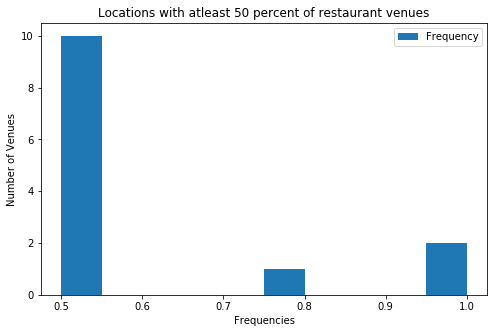

In [121]:
fin.plot(kind='hist', figsize=(8, 5))

plt.title('Locations with atleast 50 percent of restaurant venues') # add a title to the histogram
plt.ylabel('Number of Venues') # add y-label
plt.xlabel('Frequencies') # add x-label

plt.show()

In [122]:
res[res["Frequency"] != 0.0].sort_values('Frequency',ascending = True).reset_index(drop=True)

,Neighborhood,Venue,Frequency
0,Bilichi,Japanese Restaurant,0.01
1,Vellonie,Mediterranean Restaurant,0.01
2,Vellonie,Seafood Restaurant,0.01
3,Vellonie,Mexican Restaurant,0.01
4,Coimbatore Collectorate,Chinese Restaurant,0.01
5,Tatabad,Vegetarian / Vegan Restaurant,0.01
6,Bilichi,Caucasian Restaurant,0.01
7,Tatabad,North Indian Restaurant,0.01
8,Coimbatore West,Vegetarian / Vegan Restaurant,0.02
9,Coimbatore West,Restaurant,0.02


In [123]:
res[res["Frequency"] == 0.0].sort_values('Frequency',ascending = True).reset_index(drop=True)

,Neighborhood,Venue,Frequency
0,A.Nagore,Afghan Restaurant,0.0
1,Ramachandrapuram,Modern European Restaurant,0.0
2,Ramachandrapuram,Middle Eastern Restaurant,0.0
3,Ramachandrapuram,Mexican Restaurant,0.0
4,Ramachandrapuram,Seafood Restaurant,0.0
5,Ramachandrapuram,Afghan Restaurant,0.0
6,Puliampatti,Modern European Restaurant,0.0
7,Puliampatti,Middle Eastern Restaurant,0.0
8,Puliampatti,Mexican Restaurant,0.0
9,Puliampatti,Seafood Restaurant,0.0
